In [8]:
##Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)

In [10]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
# Statistical Summary of Continuous Variables:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
## Check for objects
for col in titanic.columns:
  if titanic[col].dtype=='object':
    
     print(col,'\t',titanic[col].dtype)

Name 	 object
Sex 	 object
Ticket 	 object
Cabin 	 object
Embarked 	 object


In [15]:
titanic['Survived'].dtype

dtype('int64')

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

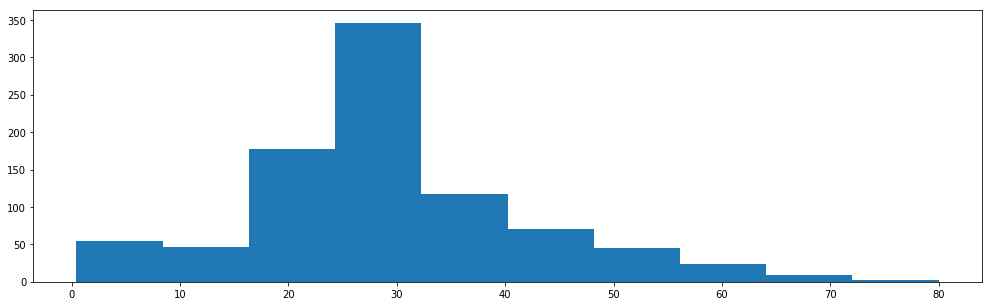

In [17]:
titanic.Age.fillna(value=titanic.Age.median(), inplace=True)
plt.figure(figsize=(17,5))
plt.hist(titanic['Age'])
plt.show()

In [20]:
print('Max Age' , titanic['Age'].max())
print('Min Age', titanic['Age'].min())
print('Median Age', titanic['Age'].median())

Max Age 80.0
Min Age 0.42
Median Age 28.0


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


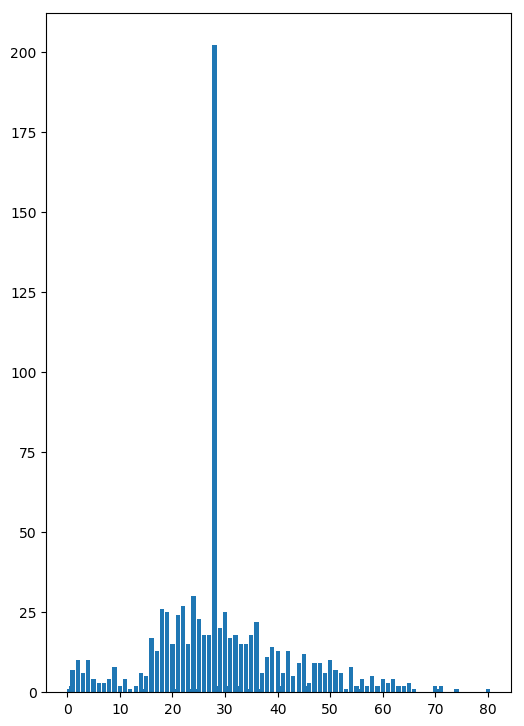

In [21]:
## gives the graph without NaN

figure = plt.figure(figsize=(6,9), dpi=100);    
graph = figure.add_subplot(111);

freq = pd.value_counts(titanic['Age'])
bins = freq.index
x=graph.bar(bins, freq.values)figure.show()

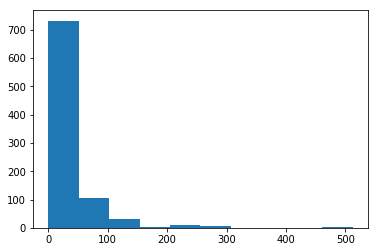

In [22]:
# to check the distibution of fare 
plt.hist(titanic['Fare']) 
plt.show()

In [28]:
### Categorical variables and values counts
print(titanic['Pclass'].value_counts()) #Pclass
print(titanic['Sex'].value_counts()) #Sex
print(titanic['Embarked'].value_counts()) #Emabarked
print(titanic['Cabin'].value_counts()) #Cabin

3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
F33            3
F2             3
E101           3
D              3
C22 C26        3
D35            2
C65            2
E33            2
C2             2
C93            2
B28            2
F4             2
E67            2
D17            2
B18            2
E8             2
C78            2
D33            2
E121           2
C83            2
C92            2
B58 B60        2
D36            2
B20            2
B51 B53 B55    2
E25            2
E44            2
              ..
C101           1
C85            1
D45            1
A20            1
C87            1
C128           1
E31            1
D37            1
B19            1
D6             1
E49            1
C110           1
B69            1
A32            1
A31            1
E58            1
A19            1
B94            1
B101 

In [31]:
 #repacing NAN with string N 
titanic.Cabin.fillna(value='N', inplace=True)
list_cabin=[]
for i  in titanic['Cabin']:
  list_cabin.append(i[0])

In [32]:
# added modified cabin column with Nulls removed and category with only first letter of the cabin
titanic['Cabin_mod']=list_cabin 

In [33]:
titanic.columns #cabin_mod is added to the titanic df

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_mod'],
      dtype='object')

In [34]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_mod
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,N


In [35]:
titanic['Cabin_mod'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_mod, dtype: int64

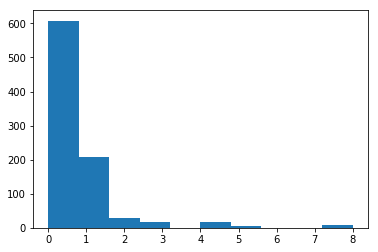

In [36]:
plt.hist(titanic['SibSp'])
plt.show()

In [38]:
#creating bin of Age column
bins = [0, 10, 20, 30, 40, 50, 60,80,100]
labels = [1,2,3,4,5,6,8,10]
titanic['binned'] = pd.cut(titanic['Age'], bins=bins, labels=labels)
print (titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Cabin_mod binned  
0      0         A/5 21171   7.2500     N        S         N      3  
1      0          PC 17599  71.2833   C85        C         C      4  
2      0  STON/O2. 3101282   7.9250     N        S         N      3  
3      0            113803  53.1000  C12

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


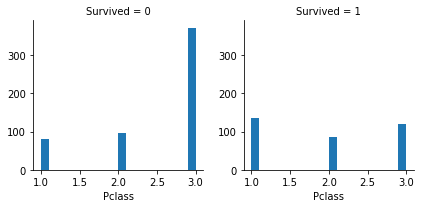

In [40]:
### relation ship between survived and class of passenger
print(titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
g = sb.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


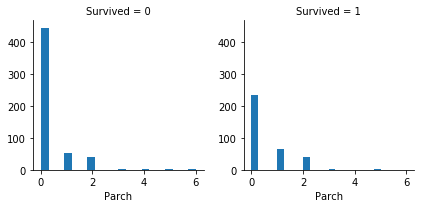

In [42]:
### relation ship between survived and Parch of passenger
print(titanic[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
g = sb.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Parch', bins=20)


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


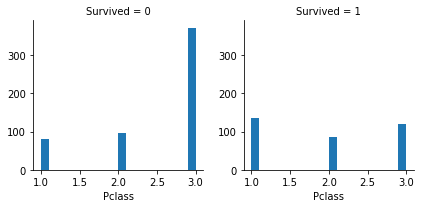

In [43]:
### relation ship between survived and Pclass of passenger
print(titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
g = sb.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

      Sex  Survived
0  female  0.742038
1    male  0.188908


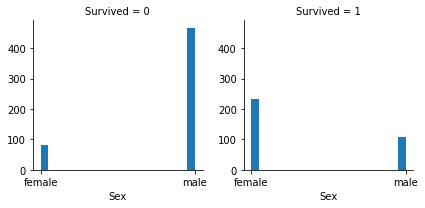

In [44]:
### relation ship between survived and sex of passenger
print(titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
g = sb.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Sex', bins=20)

  Age_Bin  Survived
0       1  0.593750
3       4  0.445161
5       6  0.404762
4       5  0.383721
1       2  0.382609
2       3  0.334152
6       8  0.227273
7      10       NaN


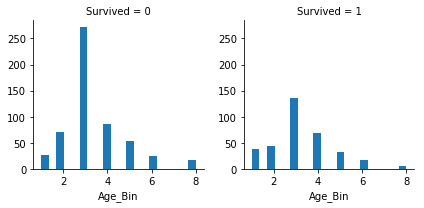

In [46]:
### relation ship between survived and Age bin of passenger
titanic.rename(columns={'binned':'Age_Bin'},inplace= True)
print(titanic[['Age_Bin', 'Survived']].groupby(['Age_Bin'], as_index=False).mean().sort_values(by='Survived', ascending=False))
g = sb.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age_Bin', bins=20)

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


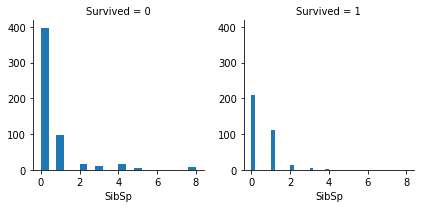

In [47]:
### relation ship between survived and Sibsp of passenger
print(titanic[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
g = sb.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'SibSp', bins=20)

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


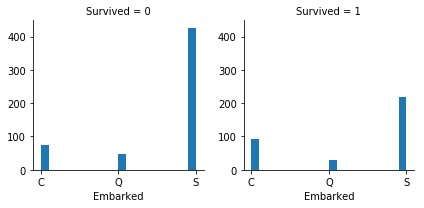

In [49]:
### relation ship between survived and Emabarked of passenger
print(titanic[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))
g = sb.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Embarked', bins=20)

In [ ]:
### Since majority of the rows are nulls (N) we can simply remove this column from the dataset
### Hence Cabin, Cabin_mod along with Passenger_Id and Name,Age and Embarked are removed

deleted_cols=titanic.drop(['Name','PassengerId','Cabin', 'Cabin_mod','Age','Embarked','Ticket'],axis=1,inplace=True)


In [55]:
titanic.columns.values

array(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age_Bin'], dtype=object)

In [56]:
#Creating Dummies of the categorical variable
cat_col=['Pclass','Sex','Age_Bin']

for col in cat_col:
    dummies=pd.get_dummies(titanic[col],prefix=col)
    X = titanic.join(dummies)

In [57]:
X.columns.values

array(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age_Bin',
       'Age_Bin_1', 'Age_Bin_2', 'Age_Bin_3', 'Age_Bin_4', 'Age_Bin_5',
       'Age_Bin_6', 'Age_Bin_8', 'Age_Bin_10'], dtype=object)

In [59]:
X.drop(['Pclass','Sex','Age_Bin'],axis=1,inplace=True)

In [60]:
#Creating target and features
y=titanic.pop('Survived') 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
print("size of train_features",X_train.shape)
print("size of train_target",y_train.shape)
print("size of test_features",X_test.shape)
print("size of test_target",y_test.shape)

size of train_features (712, 12)
size of train_target (712,)
size of test_features (179, 12)
size of test_target (179,)


# Decision tree classifier

In [63]:
#decision tree classifier
from sklearn import tree
dtree=tree.DecisionTreeClassifier(min_samples_leaf=2,max_leaf_nodes=4) 

In [64]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [65]:
#Predicting the test set using decision tree 
prediction=dtree.predict(X_test)

In [66]:
#accuracy score after tuning min_samples_leaf=2
metrics.accuracy_score(y_test, prediction)

1.0

In [67]:
#number of misclassified samples
count_misclassified = (y_test != prediction).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 0


In [68]:
from sklearn import metrics, cross_validation
predicted1 = cross_validation.cross_val_predict(dtree, X, y, cv=10)
metrics.accuracy_score(y, predicted1)

1.0

In [69]:
for name, importance in zip(titanic.columns, dtree.feature_importances_):
    print(name, importance)

Pclass 1.0
Sex 0.0
SibSp 0.0
Parch 0.0
Fare 0.0
Age_Bin 0.0


##  10 fold cross Validation

In [71]:
predicted_dtree = cross_validation.cross_val_predict(dtree, X, y, cv=10)

In [72]:
metrics.accuracy_score(y, predicted_dtree) 

1.0

## Confusion Matrix

In [73]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[105   0]
 [  0  74]]


# Calssification_report

In [77]:
class_report_dtree=classification_report(y_test, prediction, labels=None, target_names=None, sample_weight=None, digits=2)

In [79]:
print(class_report_dtree)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       105
          1       1.00      1.00      1.00        74

avg / total       1.00      1.00      1.00       179



# model works very well and shows 100 % accuracy and 0 misclassification.I have performed logistic regresion and decision tree both model and both give the same accuracy